In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from mtdlearn.mtd import MTD
from mtdlearn.preprocessing import PathEncoder

In [2]:
df = pd.read_csv('euro_usd.csv')

df['Change'] = df.Closing_rate.diff()

df['Change_enc'] = np.nan

df.loc[df.Change < 0.0, 'Change_enc'] = '1_DROP'
df.loc[df.Change < -0.005, 'Change_enc'] = '0_BIG_DROP'
df.loc[df.Change >= 0, 'Change_enc'] = '2_RISE'
df.loc[df.Change >= 0.005, 'Change_enc'] = '3_BIG_RISE'


df['Change_lagged_1'] = df.Change_enc.shift(1)
df['Change_lagged_2'] = df.Change_enc.shift(2)
df['Change_lagged_3'] = df.Change_enc.shift(3)
df['Change_lagged_4'] = df.Change_enc.shift(4)

df.dropna(inplace=True)

x = df.Change_lagged_4 + '>' + df.Change_lagged_3 + '>' + df.Change_lagged_2 + '>' + df.Change_lagged_1
y = df.Change_enc

x = x.values.astype(str).reshape(-1, 1)
y = y.values.astype(str)

df.Change_enc.value_counts().sort_index()

0_BIG_DROP    1178
1_DROP        1511
2_RISE        1680
3_BIG_RISE    1147
Name: Change_enc, dtype: int64

## Fit models

In [3]:
aics = []
bics = []

In [4]:
order = 1
pe = PathEncoder(order)
pe.fit(x, y)

x_tr, y_tr = pe.transform(x, y)

model = MTD(n_dimensions=4, order=order, n_jobs=-1, number_of_initiations=100)
model.fit(x_tr, y_tr)
aics.append(model.aic)
bics.append(model.bic)

print(model.aic.round(1), model.bic.round(1))

best value: -7554.942062082113
15133.9 15213.3


In [5]:
order = 2
pe = PathEncoder(order)
pe.fit(x, y)

x_tr, y_tr = pe.transform(x, y)

model = MTD(n_dimensions=4, order=order, n_jobs=-1, number_of_initiations=100)
model.fit(x_tr, y_tr)
aics.append(model.aic)
bics.append(model.bic)

print(model.aic.round(1), model.bic.round(1))

best value: -7544.611105042082
15131.2 15270.1


In [6]:
order = 3
pe = PathEncoder(order)
pe.fit(x, y)

x_tr, y_tr = pe.transform(x, y)

model = MTD(n_dimensions=4, order=order, n_jobs=-1, number_of_initiations=100)
model.fit(x_tr, y_tr)
aics.append(model.aic)
bics.append(model.bic)

print(model.aic.round(1), model.bic.round(1))

best value: -7534.134927385597
15128.3 15326.7


In [7]:
order = 4
pe = PathEncoder(order)
pe.fit(x, y)

x_tr, y_tr = pe.transform(x, y)

model = MTD(n_dimensions=4, order=order, n_jobs=-1, number_of_initiations=100)
model.fit(x_tr, y_tr)
aics.append(model.aic)
bics.append(model.bic)

print(model.aic.round(1), model.bic.round(1))

best value: -7530.15345047589
15138.3 15396.3


## Choose model

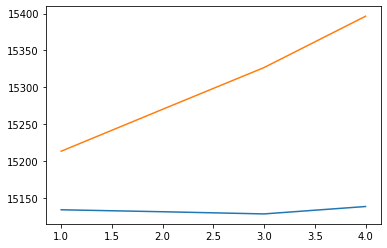

In [8]:
sns.lineplot(x=[1, 2, 3, 4], y=aics)
sns.lineplot(x=[1, 2, 3, 4], y=bics);